## The Car Price Prediction Problem

Problem statement:  

A dataset that records the selling prices of 8,128 cars in India is given. The prices are recorded along with some other attributes like - kilometer driven,year,selling_price,fuel,seller_type,transmission and Owner details.

Objective: Following tasks are performed: EDA, Initial model fitting step ,Feature engineering ,Model fitting after feauture engineering. Experiment and check if a decision tree model can be used to fit the data mode accurately and perform Model testing.


In [54]:
#Importing all the required libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
from statsmodels.stats.outliers_influence import variance_inflation_factor
scaler = StandardScaler()
from pandas import DataFrame
import statsmodels.api as stm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import warnings
warnings.simplefilter("ignore")

In [55]:
# Reading the dataset:
dataset= pd.read_csv("cars.csv")
#number of rows and columns
dataset.shape

(8128, 12)

In [56]:
# split into train , validation and  test sets
data,test = train_test_split(dataset, test_size=0.18, random_state=4)
# split into train test sets
train,valid = train_test_split(data, test_size=0.22, random_state=4)
cars = df =  train
print('Size of train data :' ,len(train))
print('Size of valid data :' ,len(valid))
print('Size of test data :' ,len(test))

Size of train data : 5197
Size of valid data : 1467
Size of test data : 1464


### 2. Exploratory data analysis:


In [57]:
#checking if the data has missing values or not.
cars.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5197 entries, 6588 to 7762
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5197 non-null   object 
 1   year           5197 non-null   int64  
 2   selling_price  5197 non-null   int64  
 3   km_driven      5197 non-null   int64  
 4   fuel           5197 non-null   object 
 5   seller_type    5197 non-null   object 
 6   transmission   5197 non-null   object 
 7   owner          5197 non-null   object 
 8   mileage        5060 non-null   float64
 9   engine         5060 non-null   float64
 10  max_power      5060 non-null   float64
 11  seats          5060 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 527.8+ KB


#### Missing values are oberved in the dataset

In [58]:
# Analysing the CVDOT of the dataset
cars.describe()      #describing the dataset statistically

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5197.000000,5.197000e+03,5.197000e+03,5060.000000,5060.000000,5060.000000,5060.000000
mean,2013.814508,6.395673e+05,6.991161e+04,19.421875,1458.044862,91.479957,5.414822
std,4.051753,8.084765e+05,6.150840e+04,4.075922,507.560816,35.916765,0.952757
min,1994.000000,3.000000e+04,1.000000e+03,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,6.800000e+05,9.500000e+04,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [59]:
#Removing the missing values
cars.dropna(inplace=True)
cars = df
cars.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [60]:
# Removing the columns which are ignored: ("name","year")
cars.drop(["name","year"], axis='columns', inplace=True)

In [61]:
cars.head()  # Veiwing the dataset

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
6588,5500000,8500,Diesel,Dealer,Automatic,First Owner,16.78,1995.0,190.00,5.0
593,300000,66693,Petrol,Dealer,Manual,First Owner,25.17,799.0,53.30,5.0
5795,600000,90000,Diesel,Individual,Automatic,First Owner,17.20,1968.0,138.10,5.0
4300,800000,25000,Petrol,Individual,Manual,First Owner,15.85,1499.0,110.40,5.0
1304,451000,91000,Diesel,Individual,Manual,First Owner,22.54,1396.0,88.73,5.0


### EDA and  Data manipulation :

#### Univariate analysis 

boxplot of km_driven


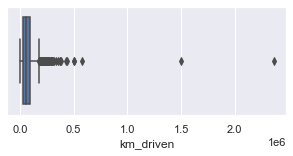

boxplot of mileage


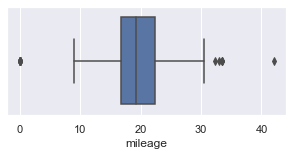

boxplot of engine


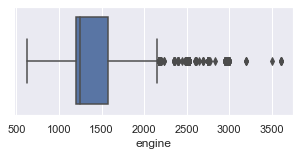

boxplot of max_power


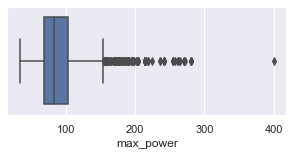

In [62]:
#Plotting the barplot to understand the outliers in the features:
df_boxplot = cars[['km_driven', 'mileage', 'engine','max_power']]  #Choosing the variables for the analysis
for i in df_boxplot.columns:     #using for loop for different variables
    plt.figure(figsize=(5,2))    #to plot the figure
    print("boxplot of %s" %(i))  #tagging the title
    sns.boxplot(x=i, data=cars) #Plotting the box plot
    plt.show()

Outliers are observed in the feautures of mileage, km driven,max_power. Hence they are to be removed

In [63]:
#removing the outlier
cars= cars[cars.max_power != max(cars.max_power)] 
cars= cars[cars.mileage != min(cars.mileage)] 
cars= cars[cars.mileage != max(cars.mileage)] 
cars= cars[cars.km_driven != max(cars.km_driven)] 
cars= cars[cars.km_driven != max(cars.km_driven)] 
cars= cars[cars.km_driven != min(cars.km_driven)] 

boxplot of km_driven


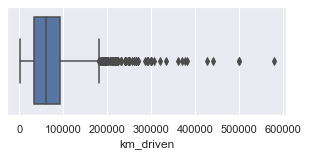

boxplot of mileage


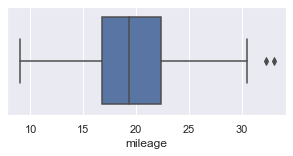

boxplot of engine


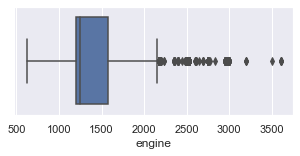

boxplot of max_power


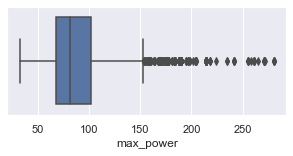

In [64]:
#Plotting the barplot to understand the outliers in the features:
df_boxplot = cars[['km_driven', 'mileage', 'engine','max_power']]  #Choosing the variables for the analysis
for i in df_boxplot.columns:     #using for loop for different variables
    plt.figure(figsize=(5,2))    #to plot the figure
    print("boxplot of %s" %(i))  #tagging the title
    sns.boxplot(x=i, data=cars) #Plotting the box plot
    plt.show()

The outliers are removed from the dataset. 

Next step is to analyse the sales of cars based on the categorical variables.

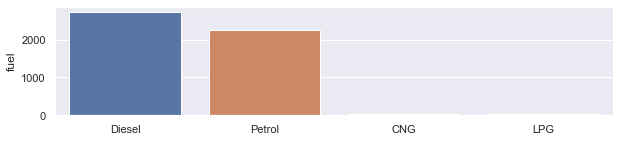

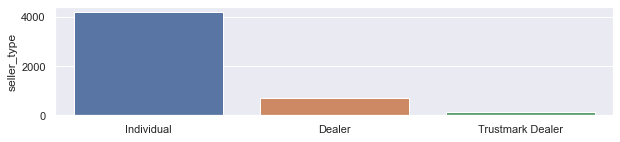

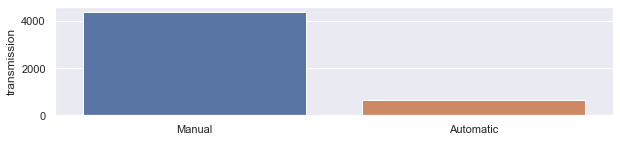

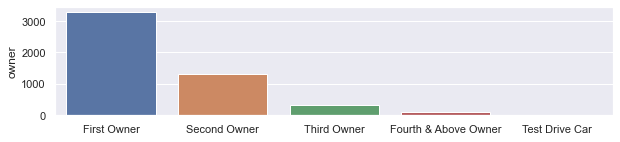

In [65]:
# Understanding the distribution of the no. of cars sold 
# in the following categories: ['fuel', 'seller_type', 'transmission', 'owner']

df_barplot = cars[['fuel', 'seller_type', 'transmission', 'owner']]  #Choosing the variables for the analysis
for i in df_barplot.columns:                  #using for loop for different variables
    plt.figure(figsize=(10,2))                #to plot the figure
    cat_num = cars[i].value_counts()        
    sns.barplot(x=cat_num.index, y=cat_num)   #Plotting the bar plot
    plt.show()


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

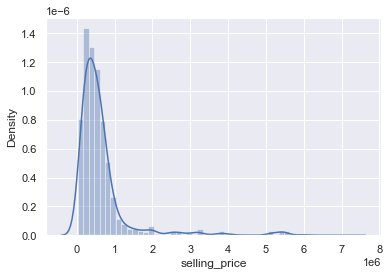

In [66]:
# Understyanding the distribution of the price in the dataset:
sns.distplot(cars['selling_price'])

The prcie of the cars sold are right skewed.

### Histogram  of the numerical features:

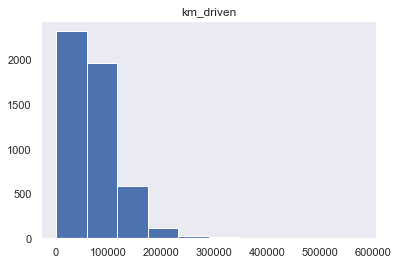

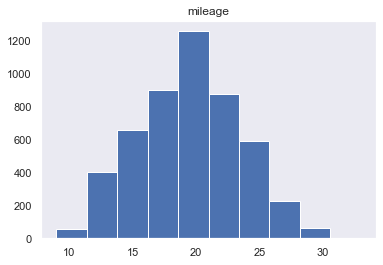

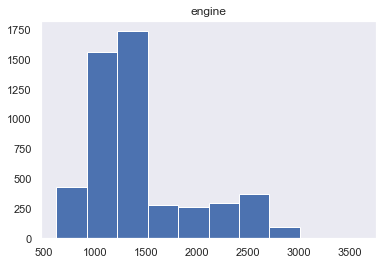

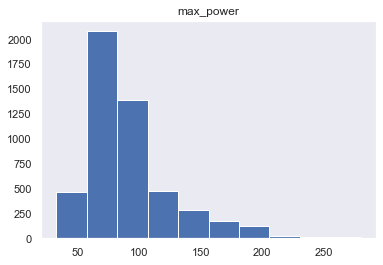

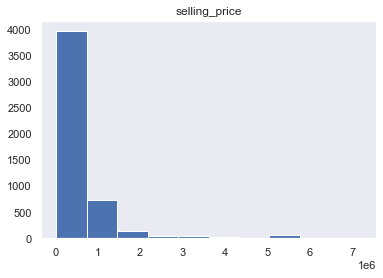

In [67]:
#Plotting the Histogram to understand the distribution of the variables:
cars.hist(column='km_driven',grid=False, figsize=(6,4))
cars.hist(column='mileage',grid=False,figsize=(6,4))
cars.hist(column='engine',grid=False,figsize=(6,4))
cars.hist(column='max_power',grid=False,figsize=(6,4))
cars.hist(column='selling_price',grid=False,figsize=(6,4))
plt.show()

#### Bi-variate analysis

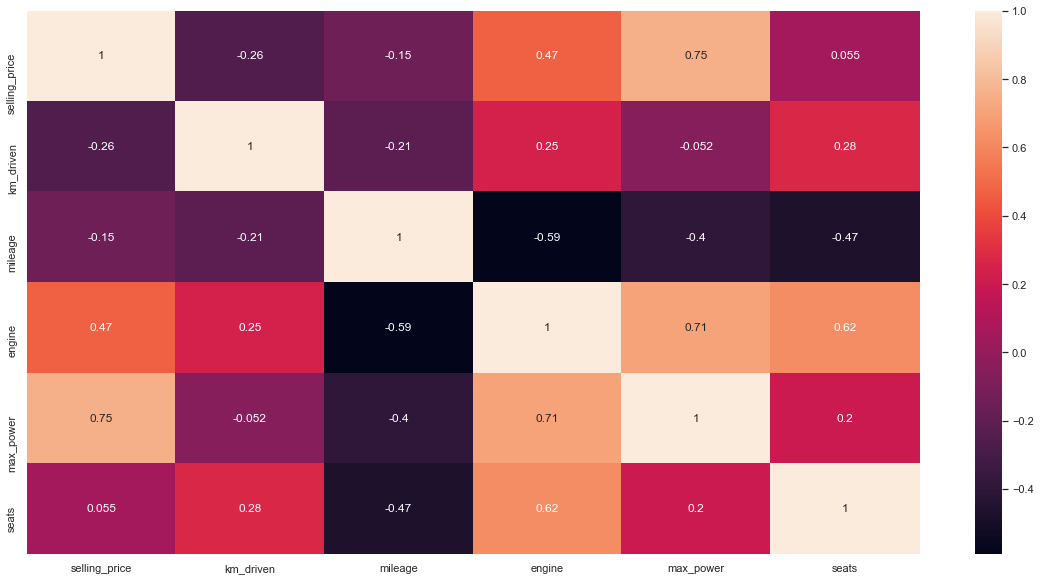

In [68]:
#Using the heatmap from seaborn library to understand the correlation amoung the variables:
sns.set()
corr = cars.corr()
plt.figure(figsize=(20,10))   #initialising the figure size
sns.heatmap(corr,annot=True)  #plotting the heat map to determine correlation
plt.show()

From the above analysis we have decided the choose the following variables for initial model fitting setup which will be altered later during the process of feature engineering.
Following are the vaiables:('engine','max_power',"seats")

In [69]:
## Comparing the plots with each variables:

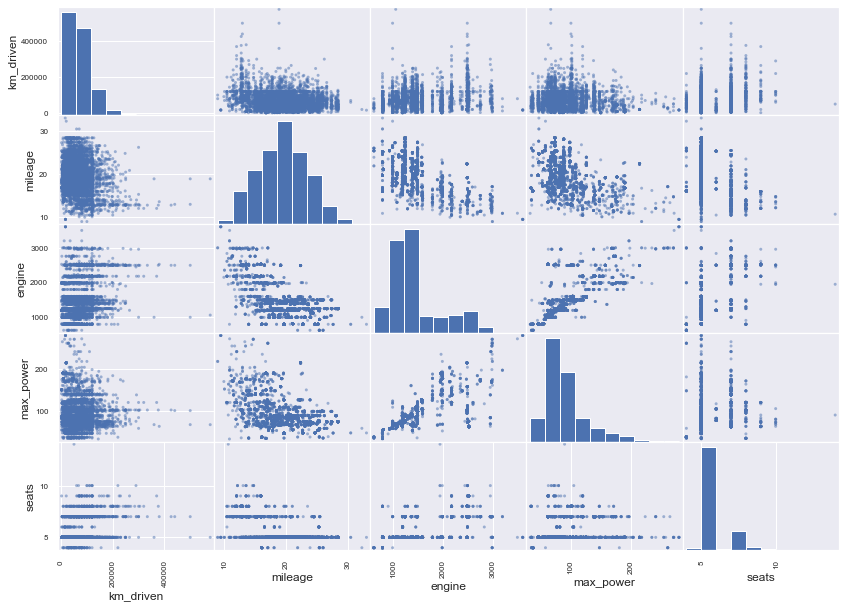

In [70]:
from pandas.plotting import scatter_matrix  #importing the function

features = ['km_driven','mileage', 'engine','max_power',"seats"]
scatter_matrix(cars[features], figsize=(14,10),diagonal='hist')
plt.show()

### 3. Initial model fitting setup 


#### Linear regression Model - 1

Using the continuous numerical variables which is chosen based on the EDA process:

Set of Predictors : ['km_driven','mileage', 'engine','max_power',"seats"]

In [71]:
#Assigning the set of target variables and predictors : 
X = cars[['km_driven','mileage', 'engine','max_power',"seats"]]    #Target Variables
Y = cars['selling_price']                                                        #Predictrs
#Splitting the data set into test and train for the train and validation purpose:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state = 7)

In [72]:
# Standardizing the target variables :
std = StandardScaler()                    #Assigning the function
X_train_std = std.fit_transform(X_train)  #Standardizing the train set of data 
X_test_std = std.transform(X_test)        #Standardizing the test set of data 
lr = LinearRegression()            #Linear regression function assigned to lr
lr.fit(X_train_std,Y_train)        #fitting the model
Y_pred = lr.predict(X_test_std)    #predicted value


#Calculating the mean absolute error:  
print("The MAE is :" ,mean_absolute_error(Y_test,Y_pred) ) #Mean absolute error 
#Calculating the R_square value:
print("The R-square is :",r2_score(Y_test,Y_pred))    #R_square value

The MAE is : 285545.4551922228
The R-square is : 0.6507035624346256


#### 10-fold cross-validation of the chosen set of predictors :

In [73]:
# create a KFold object with 10 splits 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)       #Split of the dataset

scores = cross_val_score(lr, X_train, Y_train, scoring='r2', cv=folds)  #fitting the Cross validation

print("The average value obtained in 10-fold cross-validation is : ", np.mean(scores))

The average value obtained in 10-fold cross-validation is :  0.603841850767639


#### R2 value is : 0.60

#### Linear regression Model - 2

Using the feautures selected from the correlation matrix plotted:

In [74]:
#Assigning the set of target variables and predictors : 
X = cars[['engine','max_power','seats']]    #Target Variables
Y = cars['selling_price']                                                        #Predictors
#Splitting the data set into test and train for the train and validation purpose:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state = 7)

In [75]:
# Standardizing the target variables :
std = StandardScaler()                    #Assigning the function
X_train_std = std.fit_transform(X_train)  #Standardizing the train set of data 
X_test_std = std.transform(X_test)        #Standardizing the test set of data 
lr = LinearRegression()            #Linear regression function assigned to lr
lr.fit(X_train_std,Y_train)        #fitting the model
Y_pred = lr.predict(X_test_std)    #predicted value


#Calculating the mean absolute error:  
print("The MAE is :" ,mean_absolute_error(Y_test,Y_pred) ) #Mean absolute error 
#Calculating the R_square value:
print("The R-square is :",r2_score(Y_test,Y_pred))    #R_square value

The MAE is : 310502.43456848536
The R-square is : 0.5987376547132972


#### 10-fold cross-validation of the chosen set of predictors :

In [76]:
# create a KFold object with 10 splits 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)       #Split of the dataset

scores = cross_val_score(lr, X_train, Y_train, scoring='r2', cv=folds)  #fitting the Cross validation
print("The average value obtained in 10-fold cross-validation is : ", np.mean(scores))

The average value obtained in 10-fold cross-validation is :  0.5482304831794839


There is a significant drop in R2 value . hence this model is not considered.

#### R2 value is : 0.54

###  Feature engineering

#### Feature genertion and transformation:

In [77]:
# Creating the duplicate dataset

# split into train test sets
data,test = train_test_split(dataset, test_size=0.18, random_state=4)
# split into train test sets
train,valid = train_test_split(data, test_size=0.22, random_state=4)
df = train

In [78]:
# Creating a new feauture:
#Age of the cars :
cars['age'] = 2021 - df['year']          #Calculating the age of the house since construction
cars.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
6588,5500000,8500,Diesel,Dealer,Automatic,First Owner,16.78,1995.0,190.00,5.0,2
593,300000,66693,Petrol,Dealer,Manual,First Owner,25.17,799.0,53.30,5.0,5
5795,600000,90000,Diesel,Individual,Automatic,First Owner,17.20,1968.0,138.10,5.0,8
4300,800000,25000,Petrol,Individual,Manual,First Owner,15.85,1499.0,110.40,5.0,6
1304,451000,91000,Diesel,Individual,Manual,First Owner,22.54,1396.0,88.73,5.0,7


<AxesSubplot:xlabel='age', ylabel='Count'>

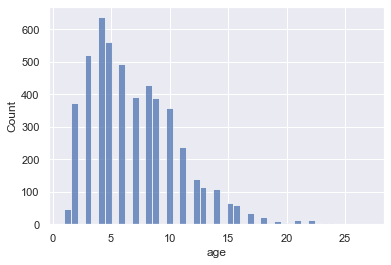

In [79]:
#Plotting the No.of house w.r.t age of the house:
sns.histplot(data= cars['age'], x=cars['age'])

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

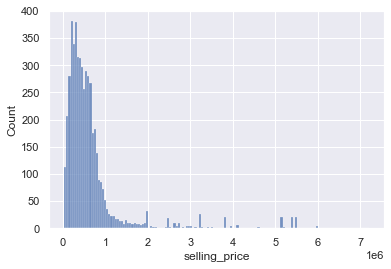

In [80]:
#Plotting the No.of house w.r.t age of the house:
sns.histplot(data= cars['selling_price'], x=cars['selling_price'])

### Linear regression Model - by adding age feauture to the Linear model -1:

Set of Predictors used : ['km_driven','mileage', 'engine','max_power','age']

In [81]:
#Assigning the set of target variables and predictors : 
X = cars[['km_driven','mileage', 'engine','max_power','age']]    #Target Variables
Y = cars['selling_price']                                                        #Predictors
#Splitting the data set into test and train for the train and validation purpose:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state = 7)

In [82]:
# Standardizing the target variables :
std = StandardScaler()                    #Assigning the function
X_train_std = std.fit_transform(X_train)  #Standardizing the train set of data 
X_test_std = std.transform(X_test)        #Standardizing the test set of data 
lr = LinearRegression()            #Linear regression function assigned to lr
lr.fit(X_train_std,Y_train)        #fitting the model
Y_pred = lr.predict(X_test_std)    #predicted value

#Calculating the mean absolute error:  
print("The MAE is :" ,mean_absolute_error(Y_test,Y_pred) ) #Mean absolute error 
#Calculating the R_square value:
print("The R-square is :",r2_score(Y_test,Y_pred))    #R_square value

The MAE is : 283240.4673707737
The R-square is : 0.6616339282088353


#### 10-fold cross-validation of the chosen set of predictors :

In [83]:
# create a KFold object with 10 splits 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)       #Split of the dataset

scores = cross_val_score(lr, X_train, Y_train, scoring='r2', cv=folds)  #fitting the Cross validation

print("The average value obtained in 10-fold cross-validation is : ", np.mean(scores))
print("The maximum value obtained in 10-fold cross-validation is : ", max(scores))

The average value obtained in 10-fold cross-validation is :  0.6211496559947504
The maximum value obtained in 10-fold cross-validation is :  0.6956723344882719


By adding the feature age, the R2 value obtained is 0.622. And also by removing the seats from the model fitted , there is a slight drop in R2 value to 0.01.

Hence the 'seats' is removed from the model.

### R2 value is :  0.62

#### Taking the log on the continuos variables:

In [84]:
#Creating the dataframe for log:
cars_log = cars

In [85]:
#Taking the log on the continuos variables:
cars_log.selling_price = np.log(cars.selling_price)
cars_log.km_driven = np.log(cars.km_driven)
cars_log.mileage = np.log(cars.mileage)
cars_log.engine = np.log(cars.engine)
cars_log.max_power = np.log(cars.max_power)
cars_log.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
6588,15.520259,9.047821,Diesel,Dealer,Automatic,First Owner,2.820188,7.598399,5.247024,5.0,2
593,12.611538,11.107855,Petrol,Dealer,Manual,First Owner,3.225653,6.683361,3.975936,5.0,5
5795,13.304685,11.407565,Diesel,Individual,Automatic,First Owner,2.844909,7.584773,4.927978,5.0,8
4300,13.592367,10.126631,Petrol,Individual,Manual,First Owner,2.763170,7.312553,4.704110,5.0,6
1304,13.019223,11.418615,Diesel,Individual,Manual,First Owner,3.115292,7.241366,4.485598,5.0,7


In [86]:
#Assigning the set of target variables and predictors : 
X = cars_log[['km_driven','mileage', 'engine','max_power','age']]    #Target Variables
Y = cars_log['selling_price']                                                        #Predictors
#Splitting the data set into test and train for the train and validation purpose:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state = 7)

In [87]:
# Standardizing the target variables :
 
lr = LinearRegression()            #Linear regression function assigned to lr
lr.fit(X_train,Y_train)        #fitting the model
Y_pred = lr.predict(X_test)    #predicted value
Y_pred = np.exp(Y_pred)
Y_test = np.exp(Y_test)

#Calculating the mean absolute error:  
print("The MAE is :" ,mean_absolute_error(Y_test,Y_pred)) #Mean absolute error 
#Calculating the R_square value:
print("The R-square is :",r2_score(Y_test,Y_pred))    #R_square value

The MAE is : 178013.2352741505
The R-square is : 0.7369249144738447


#### 10-fold cross-validation of the chosen set of predictors :

In [88]:
# create a KFold object with 10 splits 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)       #Split of the dataset

scores = cross_val_score(lr, X_train, Y_train, scoring='r2', cv=folds)  #fitting the Cross validation

print("The average value obtained in 10-fold cross-validation is : ", np.mean(scores))
print("The maximum value obtained in 10-fold cross-validation is : ", max(scores))

The average value obtained in 10-fold cross-validation is :  0.8401963973524511
The maximum value obtained in 10-fold cross-validation is :  0.860891144660538


After taking the log on the continuos variables , the R2 value has been improved to 0.84

### R2 value : 0.84

#### Creating the dummy variables for the one-hot encoding :

Considering the (fuel,seller_type,transmission & owner) as a categorical variable ,  we do one-hot encoding on them  to transform data to binary and perform regression:

Performing the Label encoding on the fuel as there are only 2 unique values:

In [89]:
#Label encoding on the fuel
cars_log['transmission']= label_encoder.fit_transform(cars_log['transmission']) 
cars_log.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
6588,15.520259,9.047821,Diesel,Dealer,0,First Owner,2.820188,7.598399,5.247024,5.0,2
593,12.611538,11.107855,Petrol,Dealer,1,First Owner,3.225653,6.683361,3.975936,5.0,5
5795,13.304685,11.407565,Diesel,Individual,0,First Owner,2.844909,7.584773,4.927978,5.0,8
4300,13.592367,10.126631,Petrol,Individual,1,First Owner,2.763170,7.312553,4.704110,5.0,6
1304,13.019223,11.418615,Diesel,Individual,1,First Owner,3.115292,7.241366,4.485598,5.0,7


In [90]:
# create Taret and the predictor variable
feature_cols =['km_driven','mileage', 'engine','age','max_power','fuel','owner','transmission','seller_type']  #Adding the required features
x = cars_log[feature_cols] # predictor set of features
X = pd.get_dummies(x)   # Creating the binary using get_dummies

Y = (cars_log['selling_price'])                                     #Predictors
#Splitting the data set into test and train for the train and validation purpose:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state = 33)

In [91]:
# Standardizing the target variables :
lr = LinearRegression()            #Linear regression function assigned to lr
lr.fit(X_train,Y_train)        #fitting the model
Y_pred = lr.predict(X_test)    #predicted value
Y_pred = np.exp(Y_pred)
Y_test = np.exp(Y_test)
#Calculating the mean absolute error:  
print("The MAE is :" ,mean_absolute_error(Y_test,Y_pred) ) #Mean absolute error 
#Calculating the R_square value:
print("The R-square is :",r2_score(Y_test,Y_pred))    #R_square value

The MAE is : 163234.78280823003
The R-square is : 0.8073629687813114


In [92]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [93]:
from math import sqrt
print("The MAPE is :",mape(Y_test,Y_pred))
#calculate RMSE
print("The RMSE is :", sqrt(mean_squared_error(Y_test,Y_pred)))

The MAPE is : 25.853661443267516
The RMSE is : 353264.5767383602


#### 10-fold cross-validation of the chosen set of predictors :

In [94]:
# create a KFold object with 10 splits 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)       #Split of the dataset

scores = cross_val_score(lr, X_train, Y_train, scoring='r2', cv=folds)  #fitting the Cross validation


print("The average value obtained in 10-fold cross-validation is : ", np.mean(scores))
print("The maximum value obtained in 10-fold cross-validation is : ", max(scores))

The average value obtained in 10-fold cross-validation is :  0.8618477965722761
The maximum value obtained in 10-fold cross-validation is :  0.8786230346934577


After the encoding of the categorical variables , The R2 value has increased by 0.02.

### R2 value = 0.862

### Feature Importance

 As we have taken too many features the, feature importance has been analused using  the VIF and forward selection.

### VIF 

In [95]:
#Sclaing the dataset to a new dataframe:
df_scaled = scaler.fit_transform(cars[['km_driven','mileage', 'engine','max_power','age',"transmission",'seats']])
df_scaled = DataFrame(df_scaled)

In [96]:
df_scaled = df_scaled.rename(columns = {0: 'km_driven',1: 'mileage',2:'engine',3:'max_power',4:'age',5:'transmission',6:'seats'}, inplace = False)
X = df_scaled[['km_driven','mileage', 'engine','max_power','age','transmission','seats']]

In [97]:
#Computing the VIF:
vif = pd.DataFrame()
vif["VIF Value"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Value,features
0,1.813197,km_driven
1,2.404697,mileage
2,4.820729,engine
3,3.638025,max_power
4,2.260549,age
5,1.500310,transmission
6,2.173103,seats


 From the clacualtion of the VIF there is no multicollinearity is observed.Hence moving on.

### 5. Using forward selection to select an appropriate model

In [98]:
#Reading the dataset
#df= pd.read_csv("wk3_kc_house_train_data.csv")
feature_cols =['km_driven','mileage', 'engine','age','max_power','fuel','owner','transmission','seller_type']  #Adding the required features
x = cars_log[feature_cols] # predictor set of features
X = pd.get_dummies(x)   # Creating the binary using get_dummies
Y = (cars_log['selling_price'])                                     #Predictors

In [99]:
#Splitting the data set into test and train for the train and validation purpose:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state = 33)

In [100]:
#Forward selection:
sfs=SFS(LinearRegression(fit_intercept=True,
    normalize=False,n_jobs=-1),k_features=(1,4),forward=True,floating=False,verbose=2,cv=4,n_jobs=-1).fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.0s finished

[2021-07-11 09:11:21] Features: 1/4 -- score: 0.5461120136687224[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.0s finished

[2021-07-11 09:11:21] Features: 2/4 -- score: 0.8274118229170655[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished

[2021-07-11 09:11:22] Features: 3/4 -- score: 0.8424299273311107[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | 

In [101]:
#Printing the accuracy and the features which is obtained by forward selection:
print("Accuracy : ",sfs.k_score_)
print("Feautures selected : ",sfs.k_feature_names_)

Accuracy :  0.8525524140805272
Feautures selected :  ('engine', 'age', 'max_power', 'transmission')


The forward selection is used to find the best features and 'engine', 'age', 'max_power', 'transmission' are selected as the best features. 

Performing the Linear regression using the four features : 'engine', 'age', 'max_power', 'transmission'

In [102]:
# create Taret and the predictor variable
feature_cols =['age','engine','max_power','transmission']  #Adding the required features
x = cars_log[feature_cols] # predictor set of features
X = pd.get_dummies(x)   # Creating the binary using get_dummies

Y = (cars_log['selling_price'])                                     #Predictors
#Splitting the data set into test and train for the train and validation purpose:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state = 33)

In [103]:
# Standardizing the target variables :
 
lr = LinearRegression()            #Linear regression function assigned to lr
lr.fit(X_train,Y_train)        #fitting the model
Y_pred = lr.predict(X_test)    #predicted value
Y_pred = np.exp(Y_pred)
Y_test = np.exp(Y_test)
#Calculating the mean absolute error:  
print("The MAE is :" ,mean_absolute_error(Y_test,Y_pred) ) #Mean absolute error 
#Calculating the R_square value:
print("The R-square is :",r2_score(Y_test,Y_pred))    #R_square value

The MAE is : 172560.75849488584
The R-square is : 0.7740121633019656


In [104]:
print("The MAPE is :",mape(Y_test,Y_pred))
#calculate RMSE
print("The RMSE is :", sqrt(mean_squared_error(Y_test,Y_pred)))

The MAPE is : 27.066450050132694
The RMSE is : 382624.4649249895


#### 10-fold cross-validation of the chosen set of predictors :

In [105]:
# create a KFold object with 10 splits 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)       #Split of the dataset

scores = cross_val_score(lr, X_train, Y_train, scoring='r2', cv=folds)  #fitting the Cross validation


print("The average value obtained in 10-fold cross-validation is : ", np.mean(scores))
print("The maximum value obtained in 10-fold cross-validation is : ", max(scores))

The average value obtained in 10-fold cross-validation is :  0.8491108031302345
The maximum value obtained in 10-fold cross-validation is :  0.8661753509964311


OLS Model:

In [106]:
X = stm.add_constant(X)
y = (cars_log['selling_price']) 
lin_reg = stm.OLS(y, X)
results = lin_reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     7188.
Date:                Sun, 11 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:11:22   Log-Likelihood:                -1403.7
No. Observations:                5037   AIC:                             2817.
Df Residuals:                    5032   BIC:                             2850.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.2648      0.111     56.486   

From the previous model, I have selected 'engine', 'age', 'max_power', 'transmission' as important features and fitted the model.
The R2 value dropped from 0.86 to 0.85 which is very minimal.

### R2 value = 0.85

### Using the validation dataset to evaluate the model:


In [107]:
valid['age'] = 2021 - valid['year']          #Calculating the age of the house since construction
valid['transmission']= label_encoder.fit_transform(valid['transmission'])
valid.dropna(inplace=True)
valid.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
5628,BMW X4 M Sport X xDrive20d,2019,5400000,7500,Diesel,Dealer,0,First Owner,16.78,1995.0,190.00,5.0,2
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,1,Fourth & Above Owner,16.80,1493.0,110.00,5.0,14
4776,Tata Hexa XM,2018,1300000,35000,Diesel,Individual,1,First Owner,17.60,2179.0,153.86,7.0,3
3197,Tata Indigo CS eVX,2013,227999,60000,Diesel,Individual,1,Second Owner,25.00,1396.0,69.01,5.0,8
5363,Mahindra Xylo D2 BSIV,2014,395000,140000,Diesel,Individual,1,First Owner,14.00,2489.0,95.00,8.0,7


In [108]:
valid.selling_price = np.log(valid.selling_price)
valid.km_driven = np.log(valid.km_driven)
valid.mileage = np.log(valid.mileage)
valid.engine = np.log(valid.engine)
valid.max_power = np.log(valid.max_power)

In [109]:
# create Taret and the predictor variable
feature_cols =['age','engine','max_power','transmission']  #Adding the required features
x = valid[feature_cols] # predictor set of features
X = pd.get_dummies(x)   # Creating the binary using get_dummies

Y = (valid['selling_price'])                                     #Predictors
#Splitting the data set into test and train for the train and validation purpose:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state = 33)

In [110]:
# Standardizing the target variables :

lr = LinearRegression()            #Linear regression function assigned to lr
lr.fit(X_train,Y_train)        #fitting the model
Y_pred = lr.predict(X_test)    #predicted value
Y_pred = np.exp(Y_pred)
Y_test = np.exp(Y_test)
#Calculating the mean absolute error:  
print("The MAE is :" ,mean_absolute_error(Y_test,Y_pred) ) #Mean absolute error 
#Calculating the R_square value:
print("The R-square is :",r2_score(Y_test,Y_pred))    #R_square value

The MAE is : 226852.6400264679
The R-square is : 0.7134960555058054


In [111]:
print("The MAPE is :",mape(Y_test,Y_pred))
#calculate RMSE
print("The RMSE is :", sqrt(mean_squared_error(Y_test,Y_pred)))

The MAPE is : 28.06071865689442
The RMSE is : 514718.2146489195


#### 10-fold cross-validation of the chosen set of predictors :

In [112]:
# create a KFold object with 10 splits 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)       #Split of the dataset

scores = cross_val_score(lr, X_train, Y_train, scoring='r2', cv=folds)  #fitting the Cross validation


print("The average value obtained in 10-fold cross-validation is : ", np.mean(scores))
print("The maximum value obtained in 10-fold cross-validation is : ", max(scores))

The average value obtained in 10-fold cross-validation is :  0.8195739178474589
The maximum value obtained in 10-fold cross-validation is :  0.8493195117673096


On the validation dataset, the R2 value has dropped by 0.03.

### R2 value on the Validation Dataset : 0.82

### Using the Test dataset to predict the using the best model:

In [113]:

test['age'] = 2021 - test['year']          #Calculating the age of the house since construction
test['transmission']= label_encoder.fit_transform(test['transmission'])
test.dropna(inplace=True)

In [114]:
test.selling_price = np.log(test.selling_price)
test.km_driven = np.log(test.km_driven)
test.mileage = np.log(test.mileage)
test.engine = np.log(test.engine)
test.max_power = np.log(test.max_power)
test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
6405,Chevrolet Enjoy 1.3 TCDi LS 8,2016,13.102161,11.289782,Diesel,Individual,1,First Owner,2.901422,7.129298,4.300545,8.0,5
1032,Hyundai Verna Transform SX VTVT,2011,12.899220,11.002100,Petrol,Individual,1,First Owner,2.785011,7.377134,4.636669,5.0,10
6792,Maruti Alto 800 LXI,2014,12.206073,10.596635,Petrol,Individual,1,Third Owner,3.124125,6.679599,3.856510,5.0,7
2765,Hyundai Verna 1.6 VTVT S,2015,13.384728,10.596635,Petrol,Individual,1,First Owner,2.833801,7.372118,4.798267,5.0,6
1714,Toyota Camry 2.5 Hybrid,2016,14.508658,11.128571,Petrol,Trustmark Dealer,0,First Owner,2.952825,7.821643,5.060694,5.0,5


In [115]:
# create Taret and the predictor variable
feature_cols =['age','engine','max_power','transmission']  #Adding the required features
x = test[feature_cols] # predictor set of features
X = pd.get_dummies(x)   # Creating the binary using get_dummies

Y = (test['selling_price'])                                     #Predictors
#Splitting the data set into test and train for the train and validation purpose:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state = 33)

In [116]:
# Standardizing the target variables :
 
lr = LinearRegression()            #Linear regression function assigned to lr
lr.fit(X_train,Y_train)        #fitting the model
Y_pred = lr.predict(X_test)    #predicted value
Y_pred = np.exp(Y_pred)
Y_test = np.exp(Y_test)
#Calculating the mean absolute error:  
print("The MAE is :" ,mean_absolute_error(Y_test,Y_pred) ) #Mean absolute error 
#Calculating the R_square value:
print("The R-square is :",r2_score(Y_test,Y_pred))    #R_square value

The MAE is : 187581.91764188765
The R-square is : 0.7331206385214072


In [117]:
print("The MAPE is :",mape(Y_test,Y_pred))
#calculate RMSE
print("The RMSE is :", sqrt(mean_squared_error(Y_test,Y_pred)))

The MAPE is : 23.552985162827827
The RMSE is : 443462.79349358263


#### 10-fold cross-validation of the chosen set of predictors :

In [118]:
# create a KFold object with 10 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)       #Split of the dataset
scores = cross_val_score(lr, X_train, Y_train, scoring='r2', cv=folds)  #fitting the Cross validation
print("The average value obtained in 10-fold cross-validation is : ", np.mean(scores))
print("The maximum value obtained in 10-fold cross-validation is : ", max(scores))

The average value obtained in 10-fold cross-validation is :  0.8479369805785717
The maximum value obtained in 10-fold cross-validation is :  0.8885278917066496


On the test dataset, the R2 value value obtained is 0.85.

###  Decision tree

Decision Tree Model - 1


In [119]:
#Assigning the feautures to the variable X
X = cars[['km_driven','mileage', 'engine','max_power','age']]
y = (cars[['selling_price']])

In [120]:
#Splitting the dataset in the train and test set:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=33)

In [121]:
#Decision Tree 
tr_regressor = DecisionTreeRegressor(max_depth = 5,min_samples_leaf =8) #loading the decision tree alogorithm
tr_regressor.fit(X_train,y_train)    #Fitting the model
y_pred = tr_regressor.predict(X_test) #Predicting the y values
Y_pred = np.exp(Y_pred)
Y_test = np.exp(Y_test)
#Printing the MAE,RMSE and R-square values :
print ('MAE is:', mean_absolute_error(y_test, y_pred  ))   #Calculating and printing the mean absolute error
print ('RMSE is:', sqrt(mean_squared_error(y_test,y_pred  )))  #Calculating and printing the root mean square error
print ('R-square is:', r2_score(y_test,y_pred))   #Calculating and printing the R-square value

MAE is: 0.2514694357143101
RMSE is: 0.3259055292432127
R-square is: 0.8525807415610587


In [122]:
# create a KFold object with 10 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)       #Split of the dataset
score = cross_val_score(tr_regressor, X, y,cv = folds,scoring="r2")
print("The average value obtained in 10-fold cross-validation is : ", np.mean(score))
print("The maximum value obtained in 10-fold cross-validation is : ", max(score))

The average value obtained in 10-fold cross-validation is :  0.8503166375094919
The maximum value obtained in 10-fold cross-validation is :  0.8656150649067624


### R2 value

#### Linear Regression Model-1 = 0.84
#### Decision tree Model-1  = 0.85

### Label Encoding

In [123]:
 
# Encode labels in column 'species'.
cars['fuel']= label_encoder.fit_transform(cars['fuel'])
cars['seller_type']= label_encoder.fit_transform(cars['seller_type'])
cars['transmission']= label_encoder.fit_transform(cars['transmission'])
cars['owner']= label_encoder.fit_transform(cars['owner'])
cars.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
6588,15.520259,9.047821,1,0,0,0,2.820188,7.598399,5.247024,5.0,2
593,12.611538,11.107855,3,0,1,0,3.225653,6.683361,3.975936,5.0,5
5795,13.304685,11.407565,1,1,0,0,2.844909,7.584773,4.927978,5.0,8
4300,13.592367,10.126631,3,1,1,0,2.763170,7.312553,4.704110,5.0,6
1304,13.019223,11.418615,1,1,1,0,3.115292,7.241366,4.485598,5.0,7


In [124]:
#seperating the Predictor from the other features:
X = cars[['km_driven','mileage','age','engine','max_power','fuel','seller_type','transmission']]
y=cars['selling_price']

In [125]:
#Splitting the dataset in the train and test set:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 7)

In [126]:
#Decision Tree 
tr_regressor = DecisionTreeRegressor( max_depth=6 ,max_leaf_nodes=12  ) #loading the decision tree alogorithm
tr_regressor.fit(X_train,y_train)    #Fitting the model
y_pred = tr_regressor.predict(X_test) #Predicting the y values
Y_pred = np.exp(Y_pred)
Y_test = np.exp(Y_test)
#Printing the MAE,RMSE and R-square values :
print ('MAE is:', mean_absolute_error(y_test, y_pred  ))   #Calculating and printing the mean absolute error
print ('RMSE is:', sqrt(mean_squared_error(y_test,y_pred  )))  #Calculating and printing the root mean square error
print ('R-square is:', r2_score(y_test,y_pred))   #Calculating and printing the R-square value

MAE is: 0.27810439369226575
RMSE is: 0.3658544450265004
R-square is: 0.8082674801908449


In [127]:
# create a KFold object with 10 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)       #Split of the dataset
score = cross_val_score(tr_regressor, X, y,cv = folds,scoring="r2")
print("The average value obtained in 10-fold cross-validation is : ", np.mean(score))
print("The maximum value obtained in 10-fold cross-validation is : ", max(score))

The average value obtained in 10-fold cross-validation is :  0.8114985489520921
The maximum value obtained in 10-fold cross-validation is :  0.8326914548480986


### R2 value

#### Linear Regression Model-1 = 82
#### Decision tree Model-1  = 0.81

Model fitting -3 - Using the features selected by using feature selection

In [128]:
# create Taret and the predictor variable
feature_cols =['age','engine','max_power','transmission']  #Adding the required features
x = cars_log[feature_cols] # predictor set of features
X = pd.get_dummies(x)   # Creating the binary using get_dummies
y = (cars_log['selling_price'])                    #Predictors

In [129]:
#Splitting the dataset in the train and test set:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 7)

In [130]:
#Decision Tree 
tr_regressor = DecisionTreeRegressor( max_depth=6 ,max_leaf_nodes=12  ) #loading the decision tree alogorithm
tr_regressor.fit(X_train,y_train)    #Fitting the model
y_pred = tr_regressor.predict(X_test) #Predicting the y values
Y_pred = np.exp(Y_pred)
Y_test = np.exp(Y_test)
#Printing the MAE,RMSE and R-square values :
print ('MAE is:', mean_absolute_error(y_test, y_pred  ))   #Calculating and printing the mean absolute error
print ('RMSE is:', sqrt(mean_squared_error(y_test,y_pred  )))  #Calculating and printing the root mean square error
print ('R-square is:', r2_score(y_test,y_pred))   #Calculating and printing the R-square value

MAE is: 0.2781043936922656
RMSE is: 0.3658544450265003
R-square is: 0.808267480190845


In [131]:
# create a KFold object with 10 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)       #Split of the dataset
score = cross_val_score(tr_regressor, X, y,cv = folds,scoring="r2")
print("The average value obtained in 10-fold cross-validation is : ", np.mean(score))
print("The maximum value obtained in 10-fold cross-validation is : ", max(score))

The average value obtained in 10-fold cross-validation is :  0.8114985489520923
The maximum value obtained in 10-fold cross-validation is :  0.8326914548480997


#### Finding the best model :

Using grid search to estimate the best params for the decision tree 

In [132]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [133]:
parameters = {'max_depth':range(6,15), 'max_leaf_nodes' :range(30,40)}
clf = GridSearchCV(tree.DecisionTreeRegressor(), parameters, n_jobs=4)
clf.fit(X=x, y=y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.8730703450344617 {'max_depth': 8, 'max_leaf_nodes': 39}


#### Applying the hyperparameters for the final model

In [134]:
#Decision Tree 
tr_regressor = DecisionTreeRegressor( max_depth=8 ,max_leaf_nodes=39  ) #loading the decision tree alogorithm
tr_regressor.fit(X_train,y_train)    #Fitting the model
y_pred = tr_regressor.predict(X_test) #Predicting the y values
Y_pred = np.exp(Y_pred)
Y_test = np.exp(Y_test)
#Printing the MAE,RMSE and R-square values :
print ('MAE is:', mean_absolute_error(y_test, y_pred  ))   #Calculating and printing the mean absolute error
print ('RMSE is:', sqrt(mean_squared_error(y_test,y_pred  )))  #Calculating and printing the root mean square error
print ('R-square is:', r2_score(y_test,y_pred))   #Calculating and printing the R-square value

MAE is: 0.21427297315223656
RMSE is: 0.28846399395467837
R-square is: 0.8808038213056909


In [135]:
# create a KFold object with 10 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)       #Split of the dataset
score = cross_val_score(tr_regressor, X, y,cv = folds,scoring="r2")
print("The average value obtained in 10-fold cross-validation is : ", np.mean(score))
print("The maximum value obtained in 10-fold cross-validation is : ", max(score))

The average value obtained in 10-fold cross-validation is :  0.8769365137970746
The maximum value obtained in 10-fold cross-validation is :  0.8923683869716745


### R2 value

#### Linear Regression Model-1 = 0.85
#### Decision tree Model-1  = 0.88

### Validation Dataset

In [136]:
# Encode labels in column 'species'.
valid['fuel']= label_encoder.fit_transform(valid['fuel'])
valid['fuel'].unique()

array([1, 3, 0, 2])

In [137]:
valid['seller_type']= label_encoder.fit_transform(valid['seller_type'])
valid['transmission']= label_encoder.fit_transform(valid['transmission'])
valid['owner']= label_encoder.fit_transform(valid['owner'])
valid.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
5628,BMW X4 M Sport X xDrive20d,2019,15.501910,8.922658,1,0,0,0,2.820188,7.598399,5.247024,5.0,2
8124,Hyundai Verna CRDi SX,2007,11.813030,11.686879,1,1,1,1,2.821379,7.308543,4.700480,5.0,14
4776,Tata Hexa XM,2018,14.077875,10.463103,1,1,1,0,2.867899,7.686621,5.036043,7.0,3
3197,Tata Indigo CS eVX,2013,12.337097,11.002100,1,1,1,2,3.218876,7.241366,4.234251,5.0,8
5363,Mahindra Xylo D2 BSIV,2014,12.886641,11.849398,1,1,1,0,2.639057,7.819636,4.553877,8.0,7


In [138]:
#seperating the Predictor from the other features:
X = valid[['age','engine','max_power','transmission']]
y=valid['selling_price']

In [139]:
#Splitting the dataset in the train and test set:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 7)

In [140]:
#Decision Tree 
tr_regressor = DecisionTreeRegressor( max_depth=8 ,max_leaf_nodes=39  ) #loading the decision tree alogorithm
tr_regressor.fit(X_train,y_train)    #Fitting the model
y_pred = tr_regressor.predict(X_test) #Predicting the y values
Y_pred = np.exp(Y_pred)
Y_test = np.exp(Y_test)
#Printing the MAE,RMSE and R-square values :
print ('MAE is:', mean_absolute_error(y_test, y_pred  ))   #Calculating and printing the mean absolute error
print ('RMSE is:', sqrt(mean_squared_error(y_test,y_pred  )))  #Calculating and printing the root mean square error
print ('R-square is:', r2_score(y_test,y_pred))   #Calculating and printing the R-square value

MAE is: 0.2280050741318909
RMSE is: 0.31866233417040407
R-square is: 0.8363266252965607


In [141]:
# create a KFold object with 10 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)       #Split of the dataset
score = cross_val_score(tr_regressor, X, y,cv = folds,scoring="r2")
print("The average value obtained in 10-fold cross-validation is : ", np.mean(score))
print("The maximum value obtained in 10-fold cross-validation is : ", max(score))

The average value obtained in 10-fold cross-validation is :  0.8393532119908699
The maximum value obtained in 10-fold cross-validation is :  0.8642789593461037


### R2 value - Validation

#### Linear Regression Model-1 = 0.82
#### Decision tree Model-1  = 0.84

### Test Dataset

In [142]:
 
# Encode labels in column 'species'.
test['fuel']= label_encoder.fit_transform(test['fuel'])
test['fuel'].unique()

array([1, 3, 0, 2])

In [143]:
test['seller_type']= label_encoder.fit_transform(test['seller_type'])
test['transmission']= label_encoder.fit_transform(test['transmission'])
test['owner']= label_encoder.fit_transform(test['owner'])
test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
6405,Chevrolet Enjoy 1.3 TCDi LS 8,2016,13.102161,11.289782,1,1,1,0,2.901422,7.129298,4.300545,8.0,5
1032,Hyundai Verna Transform SX VTVT,2011,12.899220,11.002100,3,1,1,0,2.785011,7.377134,4.636669,5.0,10
6792,Maruti Alto 800 LXI,2014,12.206073,10.596635,3,1,1,4,3.124125,6.679599,3.856510,5.0,7
2765,Hyundai Verna 1.6 VTVT S,2015,13.384728,10.596635,3,1,1,0,2.833801,7.372118,4.798267,5.0,6
1714,Toyota Camry 2.5 Hybrid,2016,14.508658,11.128571,3,2,0,0,2.952825,7.821643,5.060694,5.0,5


In [144]:
#seperating the Predictor from the other features:
X = test[['age','engine','max_power','transmission']]
y=test['selling_price']

In [145]:
#Splitting the dataset in the train and test set:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 7)

In [146]:
#Decision Tree 
tr_regressor = DecisionTreeRegressor( max_depth=8 ,max_leaf_nodes=39  ) #loading the decision tree alogorithm
tr_regressor.fit(X_train,y_train)    #Fitting the model
y_pred = tr_regressor.predict(X_test) #Predicting the y values
Y_pred = np.exp(Y_pred)
Y_test = np.exp(Y_test)
#Printing the MAE,RMSE and R-square values :
print ('MAE is:', mean_absolute_error(y_test, y_pred  ))   #Calculating and printing the mean absolute error
print ('RMSE is:', sqrt(mean_squared_error(y_test,y_pred  )))  #Calculating and printing the root mean square error
print ('R-square is:', r2_score(y_test,y_pred))   #Calculating and printing the R-square value

MAE is: 0.23374119214164274
RMSE is: 0.33879133568452685
R-square is: 0.8490656365001344


In [147]:
# create a KFold object with 10 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)       #Split of the dataset
score = cross_val_score(tr_regressor, X, y,cv = folds,scoring="r2")
print("The average value obtained in 10-fold cross-validation is : ", np.mean(score))
print("The maximum value obtained in 10-fold cross-validation is : ", max(score))

The average value obtained in 10-fold cross-validation is :  0.8621226543243997
The maximum value obtained in 10-fold cross-validation is :  0.895061590203577


### R2 value - Test daatset

#### Linear Regression Model-1 =  0.85
#### Decision tree Model-1  = 0.86

From the results we achieved, we can conclude the both the models are equally competant in predicting the model. However the decision tree is prone to over fit while fitting the model which can be eliminated in the linear regression model much easily.


Both the models have performed well in the test, train and validation dataset with a accuracy of 84% to 86% which proves there is no effet of Bias or Variance in the model